<a href="https://colab.research.google.com/github/rodrigosimoncalaca/projectDataScience/blob/master/TrabalhoUnisoIA/TrabalhoTitanicCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando Dados do Titanic através de Cluster**

In [0]:
#importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

## Obtendo Dados

Dados retirados do site https://www.kaggle.com/c/titanic/data)

In [0]:
titanic_dataset = pd.read_csv("/content/titanic.csv")

## Primeiras Análises

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

In [4]:
# Executar para mostrar as 5 primeiras linhas, e entendermos a estrutura para montar um dicionário das variáveis
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Dicionário de Dados

   
* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim
* Pclass: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da Passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(titanic_dataset.shape[0]))
print("Variáveis:\t {}\n".format(titanic_dataset.shape[1]))

# verificar os tipos das variáveis
display(titanic_dataset.dtypes)

Entradas:	 891
Variáveis:	 12



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [42]:
# ordenar em ordem decrescente as variáveis pela porcentagem de valores ausentes
(titanic_dataset.isnull().sum() / titanic_dataset.shape[0]).sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma, que tem como objetivo mostrar a distribuição de frequências de dados obtidos por medições, para identificarmos a frequência com que algo acontece.

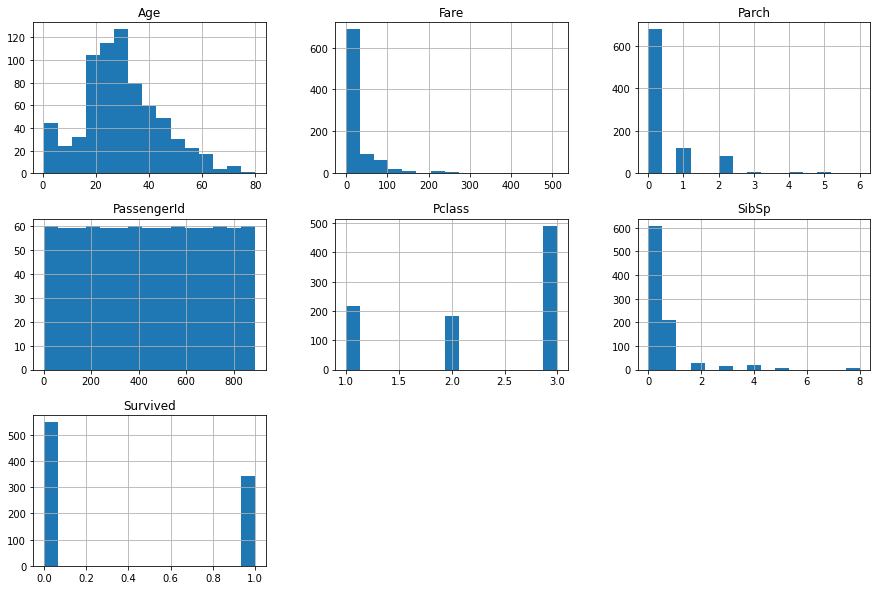

In [7]:
# plotar o histograma das variáveis numéricas
titanic_dataset.hist(bins=15, figsize=(15,10));

# **Construindo o Modelo**

1. Crie um novo quadro de dados com colunas que determinarão os clusters
2. Codifique Sex e Embarked

## Criando novo quadro de dados

In [96]:
# Vamos excluir as colunas que não iremos usar
novo_datatitanic = titanic_dataset
novo_datatitanic = novo_datatitanic.drop('Ticket', axis=1)
novo_datatitanic = novo_datatitanic.drop('Cabin', axis=1)
novo_datatitanic = novo_datatitanic.drop('Name', axis=1)
novo_datatitanic = novo_datatitanic.drop('PassengerId', axis=1)
novo_datatitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Codificando a coluna Sex e Embarked usando LabelEncoder


In [0]:
#Biblioteca usada basicamente para converter os valores categórios em valores numéricos.
from sklearn.preprocessing import LabelEncoder

In [0]:
# O indexador iloc, seleciona por números inteiros das linhas, arrays ou por slice
# Parâmetro :,3 significa que quero transformar todas as linhas da coluna com indice 3, lembrando que a contagem começa no 0
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(novo_datatitanic.iloc[:, 2])

In [0]:
#substituo a coluna Sex pelos novos valores que agora serão numéricos
novo_datatitanic['Sex'] = encoded_sex

In [0]:
novo_datatitanic=novo_datatitanic.dropna()

In [0]:
encoded_embarked = encoder.fit_transform(novo_datatitanic.iloc[:, 7])

In [0]:
novo_datatitanic['Embarked'] = encoded_embarked

In [114]:
novo_datatitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
# Estou gerando uma nova váriavel com todas as linhas a partir do indice 1 até a última coluna
features = novo_datatitanic.iloc[:, 0:-1].values

In [117]:
print(features)

[[ 0.      3.      1.     ...  1.      0.      7.25  ]
 [ 1.      1.      0.     ...  1.      0.     71.2833]
 [ 1.      3.      0.     ...  0.      0.      7.925 ]
 ...
 [ 1.      1.      0.     ...  0.      0.     30.    ]
 [ 1.      1.      1.     ...  0.      0.     30.    ]
 [ 0.      3.      1.     ...  0.      0.      7.75  ]]


### Método Cotovelo

In [0]:
#Váriavel alocando todo o dataset a partir do indice 0
X= novo_datatitanic.iloc[:,0:-1].values

In [0]:
from sklearn.cluster import KMeans
wcss=[]

In [0]:
#fórmula usada para segregar os pontos de dados em clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

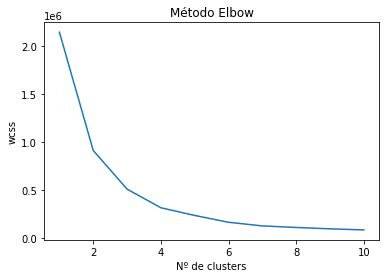

In [121]:
plt.plot(range(1,11), wcss)
plt.title('Método Elbow')
plt.xlabel('Nº de clusters')
plt.ylabel('wcss')
plt.show()

*Se diminuir o zoom nessa curva, podemos visualizar o último cotovelo em k = 4. Não importa o intervalo que selecionamos ex- (1,21), também veremos o mesmo comportamento, mas se escolhermos um intervalo mais alto, será pouco difícil visualizar o COTOVELO, é por isso que geralmente usamos o intervalo (1,11).*

**Concluimos então que k = 4**

### Clusters

In [0]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++',n_init=10,  random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)



*Para aprendizado não supervisionado, usamos "fit_predict ()", e para aprendizado supervisionado usamos "fit_tranform ()". A variável y_kmeans é o modelo final.*

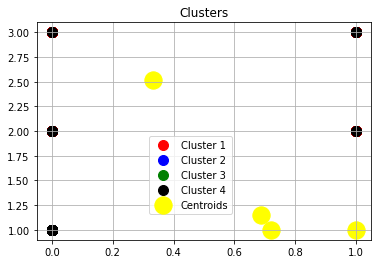

In [153]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend(loc=1, bbox_to_anchor=(0.6,0.5))
plt.grid()
plt.show()



Text(0.5, 1.0, 'Dados por cluster')

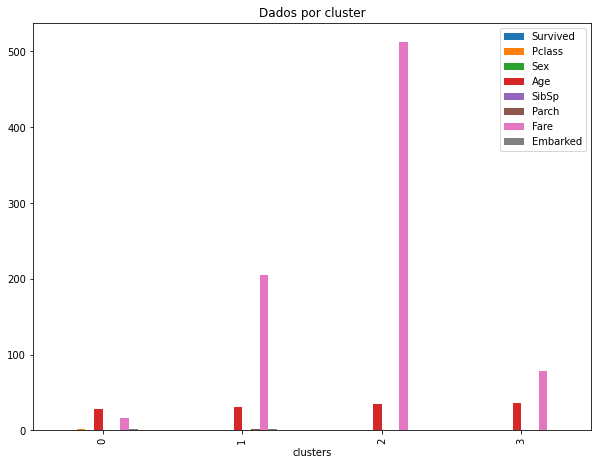

In [144]:
data_array = novo_datatitanic.values
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
novo_datatitanic["clusters"] = kmeans.fit_predict(data_array)
novo_datatitanic.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Dados por cluster")